In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Original Data 

In [301]:
mo = pd.read_csv('../data/monday.csv', delimiter =';')
tue = pd.read_csv('../data/tuesday.csv', delimiter =';' )
wed = pd.read_csv('../data/wednesday.csv', delimiter =';')
thu = pd.read_csv('../data/thursday.csv', delimiter =';')
fri = pd.read_csv('../data/friday.csv', delimiter =';')
days = pd.concat([mo, tue, wed, thu, fri], axis = 0)

In [302]:
days['timestamp'] = pd.to_datetime(days['timestamp'])
days['time'] = days['timestamp'].dt.time
days['date'] = days['timestamp'].dt.date

days.head()

,timestamp,customer_no,location,time,date
0,2019-09-02 07:03:00,1,dairy,07:03:00,2019-09-02
1,2019-09-02 07:03:00,2,dairy,07:03:00,2019-09-02
2,2019-09-02 07:04:00,3,dairy,07:04:00,2019-09-02
3,2019-09-02 07:04:00,4,dairy,07:04:00,2019-09-02
4,2019-09-02 07:04:00,5,spices,07:04:00,2019-09-02


## Load Simulated Data (Corona Virus / No Corona Virus ) 

In [309]:
sim = pd.read_csv('../data/simulated.csv', index_col =0 )
sim_c = pd.read_csv('../data/simulated_corona.csv', index_col =0 )

In [310]:
sim['date'] = pd.to_datetime(sim['date'])
sim['timestamp'] = pd.to_datetime(sim['time'])
sim_c['date'] = pd.to_datetime(sim_c['date'])
sim_c['timestamp'] = pd.to_datetime(sim_c['time'])
sim['time'] = sim['timestamp'].dt.time
sim_c['time'] = sim_c['timestamp'].dt.time


## 1. Total Number of People in Each Section

24877

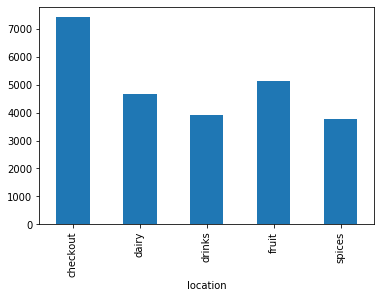

In [326]:
#Real
days.groupby('location')['customer_no'].count().plot.bar()


<BarContainer object of 5 artists>

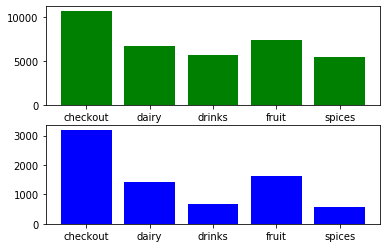

In [312]:
#Simulated
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.bar(sim.groupby('location')['customer_no'].count().index,sim.groupby('location')['customer_no'].count(),color='g')
ax2.bar(sim_c.groupby('location')['customer_no'].count().index,sim_c.groupby('location')['customer_no'].count(),color='b')


In [331]:
#Make a dataframe of total nr of people
days.groupby('location')['customer_no'].count().sum()
sim.groupby('location')['customer_no'].count().sum()
sim_c.groupby('location')['customer_no'].count().sum()

data_total = {'Real':days.groupby('location')['customer_no'].count().sum(), 'Simulated': sim.groupby('location')['customer_no'].count().sum()
, 'Simulated_Corona': sim_c.groupby('location')['customer_no'].count().sum()}
pd.DataFrame(data_total, index = ['No of ppl'])

,Real,Simulated,Simulated_Corona
No of ppl,24877,35829,7495


### 2. Calculate the Total Number of customers in Each section over Time

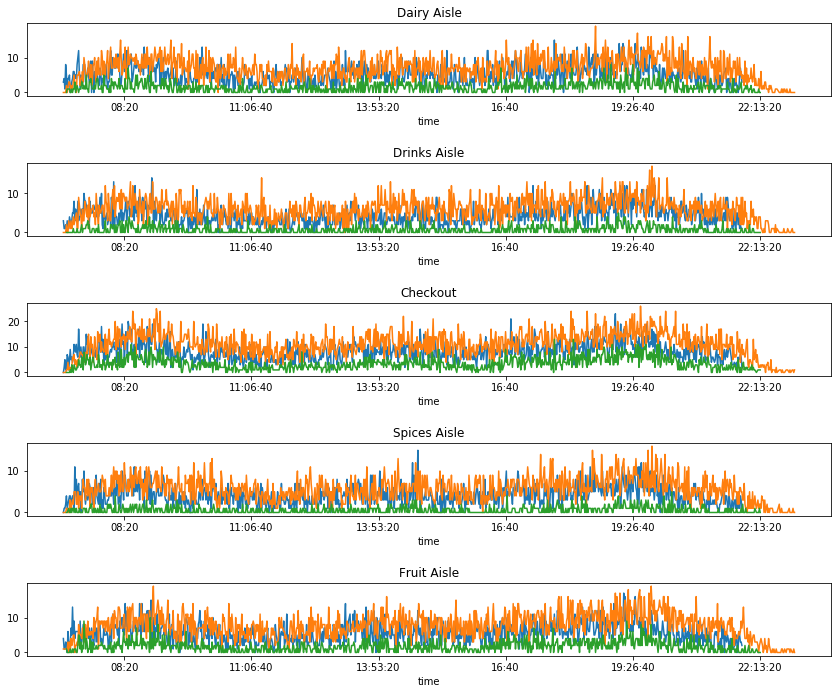

In [313]:
tot_cust_dairy = days.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['dairy']
sim_cust_d = sim.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['dairy']
sim_c_cust_d = sim_c.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['dairy']

tot_cust_dr = days.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['drinks']
sim_cust_dr = sim.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['drinks']
sim_c_cust_dr = sim_c.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['drinks']

tot_cust_c = days.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['checkout']
sim_cust_c = sim.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['checkout']
sim_c_cust_c = sim_c.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['checkout']

tot_cust_s = days.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['spices']
sim_cust_s = sim.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['spices']
sim_c_cust_s = sim_c.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['spices']

tot_cust_f = days.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['fruit']
sim_cust_f = sim.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['fruit']
sim_c_cust_f = sim_c.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['fruit']

plt.figure(figsize = (12,10))
plt.xlabel('Time')
plt.ylabel('Number of People')
plt.subplot(5,1,1) # r, c, fignum
plt.title ('Dairy Aisle')
sns.lineplot(data = tot_cust_dairy)
sns.lineplot(data = sim_cust_d)
sns.lineplot(data = sim_c_cust_d)

plt.subplot(5,1,2) # r, c, fignum
plt.title ('Drinks Aisle')
sns.lineplot(data = tot_cust_dr)
sns.lineplot(data = sim_cust_dr)
sns.lineplot(data = sim_c_cust_dr)

plt.subplot(5,1,3) # r, c, fignum
plt.title ('Checkout')
sns.lineplot(data = tot_cust_c)
sns.lineplot(data = sim_cust_c)
sns.lineplot(data = sim_c_cust_c)

plt.subplot(5,1,4) # r, c, fignum
plt.title ('Spices Aisle')
sns.lineplot(data = tot_cust_s)
sns.lineplot(data = sim_cust_s)
sns.lineplot(data = sim_c_cust_s)

plt.subplot(5,1,5) # r, c, fignum
plt.title ('Fruit Aisle')
sns.lineplot(data = tot_cust_f)
sns.lineplot(data = sim_cust_f)
sns.lineplot(data = sim_c_cust_f)

plt.tight_layout(pad=2.0)



# BLUE : REAL
# ORANGE : SIMULATED
# GREEN : SIMULATED_Corona


## 3. Display number of customers at Checkout over time 

,Real,Simulated,Simulated_Corona
No of ppl,7417.0,10681.0,3200.0


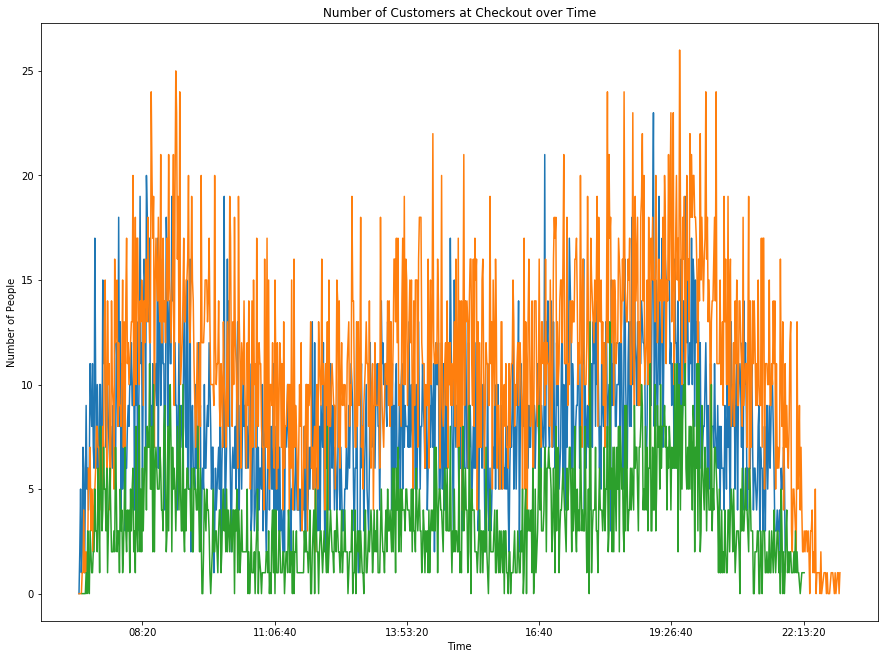

In [325]:
plt.figure(figsize = (15,11))
plt.title('Number of Customers at Checkout over Time')
plt.xlabel('Time')
plt.ylabel('Number of People')
sns.lineplot(data = tot_cust_c)
sns.lineplot(data = sim_cust_c)
sns.lineplot(data = sim_c_cust_c)

#Real
tot_cust = days.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['checkout']
#Simulated
sim_cust = sim.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['checkout']
#Simulated Corona
sim_c_cust_c = sim_c.groupby(['location', 'time']).count().unstack(0).fillna(0)['customer_no']['checkout']
data = {'Real':tot_cust.sum(), 'Simulated': sim_cust.sum(), 'Simulated_Corona': sim_c_cust_c.sum()}
pd.DataFrame(data, index = ['No of ppl'])


## 4. Calculate the time each customer spent in the market

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  


(0, 200)

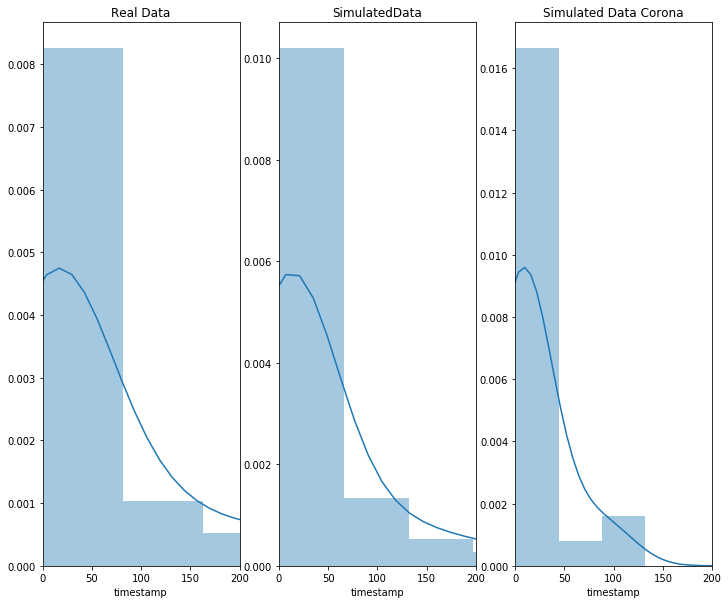

In [317]:
initial_time_r = days.groupby(['date','customer_no']).min()
final_time_r = days.groupby(['date','customer_no']).max()
duration_r = final_time_r['timestamp'] - initial_time_r['timestamp']
duration_r = duration_r.fillna(0).value_counts()

initial_time_s = sim.groupby(['date','customer_no']).min()
final_time_s = sim.groupby(['date','customer_no']).max()
duration_s = final_time_s['timestamp'] - initial_time_s['timestamp']
duration_s = duration_s.fillna(0).value_counts()

initial_time_sc = sim_c.groupby(['date','customer_no']).min()
final_time_sc = sim_c.groupby(['date','customer_no']).max()
duration_sc = final_time_sc['timestamp'] - initial_time_sc['timestamp']
duration_sc = duration_sc.fillna(0).value_counts()


plt.figure(figsize = (12,10))
plt.subplot(1,3,1) # r, c, fignum
plt.title ('Real Data')
sns.distplot(duration_r)
plt.xlim(0,200)

plt.subplot(1,3,2) # r, c, fignum
sns.distplot(duration_s)
plt.title ('SimulatedData')
plt.xlim(0,200)

plt.subplot(1,3,3) # r, c, fignum
sns.distplot(duration_sc)
plt.title ('Simulated Data Corona')
plt.xlim(0,200)





## 5. Calculate the total number of customers present in the supermarket over time
 

In [318]:
tot_cust_present_at_time = days.groupby(['date']).count()
tot_cust_present_at_time_s = sim.groupby(['date']).count()
tot_cust_present_at_time_sc = sim_c.groupby(['date']).count()

(0, 7500)

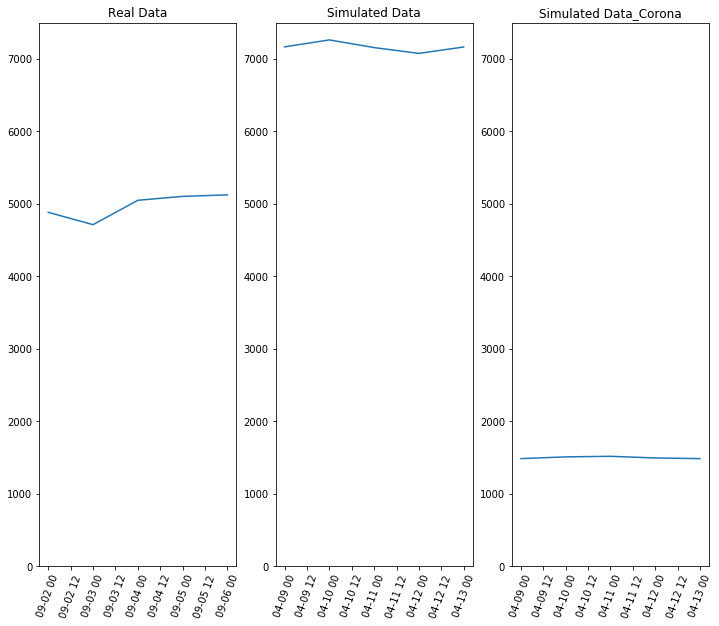

In [320]:
plt.figure(figsize = (12,10))

plt.subplot(1,3,1) # r, c, fignum
plt.title ('Real Data')
plt.xticks(rotation=70)
plt.ylim(0,7500)
sns.lineplot(data = tot_cust_present_at_time['customer_no'])

plt.subplot(1,3,2) # r, c, fignum
plt.title ('Simulated Data')
sns.lineplot(data = tot_cust_present_at_time_s['customer_no'])
plt.xticks(rotation=70)
plt.ylim(0,7500)


plt.subplot(1,3,3) # r, c, fignum
plt.title ('Simulated Data_Corona')
sns.lineplot(data = tot_cust_present_at_time_sc['customer_no'])
plt.xticks(rotation=70)
plt.ylim(0,7500)


### 6. Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”). 

In [321]:
sorted_days = days[['customer_no', 'location', 'time', 'date', 'timestamp']].sort_values(by=['date', 'customer_no', 'time'])
first_location = []
remaining_location = []
cust_number = -1
for i, row in sorted_days.iterrows():
    if row['customer_no'] == cust_number:
        remaining_location.append((row['customer_no'],row['date'], row['time'], row['location']))
        cust_number = row['customer_no'] 
    else:
        first_location.append((row['customer_no'],row['date'], row['time'], row['location']))
        cust_number = row['customer_no']
first_r = pd.DataFrame(first_location, columns = ['customer_no', 'date', 'time', 'location'])
remaining_r = pd.DataFrame(remaining_location, columns = ['customer_no', 'date', 'time', 'location'])

In [322]:
sorted_days = sim[['customer_no', 'location', 'time', 'date', 'timestamp']].sort_values(by=['date', 'customer_no', 'time'])
first_location = []
remaining_location = []
cust_number = -1
for i, row in sorted_days.iterrows():
    if row['customer_no'] == cust_number:
        remaining_location.append((row['customer_no'],row['date'], row['time'], row['location']))
        cust_number = row['customer_no'] 
    else:
        first_location.append((row['customer_no'],row['date'], row['time'], row['location']))
        cust_number = row['customer_no']
first_s = pd.DataFrame(first_location, columns = ['customer_no', 'date', 'time', 'location'])
remaining_s = pd.DataFrame(remaining_location, columns = ['customer_no', 'date', 'time', 'location'])

In [323]:
sorted_days = sim_c[['customer_no', 'location', 'time', 'date', 'timestamp']].sort_values(by=['date', 'customer_no', 'time'])
first_location = []
remaining_location = []
cust_number = -1
for i, row in sorted_days.iterrows():
    if row['customer_no'] == cust_number:
        remaining_location.append((row['customer_no'],row['date'], row['time'], row['location']))
        cust_number = row['customer_no'] 
    else:
        first_location.append((row['customer_no'],row['date'], row['time'], row['location']))
        cust_number = row['customer_no']
first_sc = pd.DataFrame(first_location, columns = ['customer_no', 'date', 'time', 'location'])
remaining_sc = pd.DataFrame(remaining_location, columns = ['customer_no', 'date', 'time', 'location'])

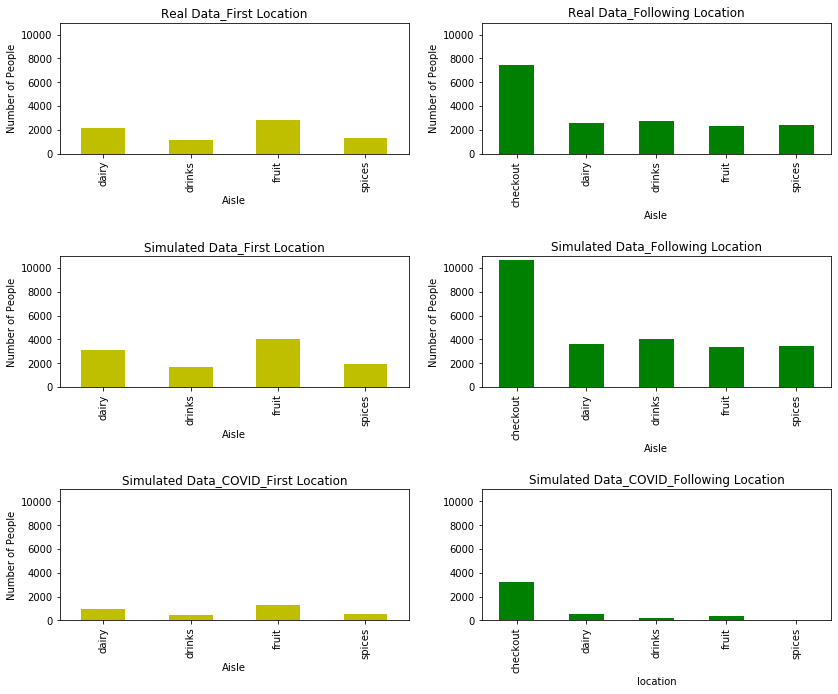

In [324]:
plt.figure(figsize = (12,10))
plt.xlabel('Aisle')
plt.ylabel('Number of People')
plt.subplot(3,2,1) # r, c, fignum
plt.title ('Real Data_First Location')
plt.ylim(0,11000)
first_r.groupby('location')['customer_no'].count().plot.bar(color = 'y')

plt.xlabel('Aisle')
plt.ylabel('Number of People')
plt.subplot(3,2,2) # r, c, fignum
plt.title ('Real Data_Following Location')
plt.ylim(0,11000)
remaining_r.groupby('location')['customer_no'].count().plot.bar(color = 'g')

plt.xlabel('Aisle')
plt.ylabel('Number of People')
plt.subplot(3,2,3) # r, c, fignum
plt.title ('Simulated Data_First Location')
plt.ylim(0,11000)
first_s.groupby('location')['customer_no'].count().plot.bar(color = 'y')

plt.xlabel('Aisle')
plt.ylabel('Number of People')
plt.subplot(3,2,4) # r, c, fignum
plt.title ('Simulated Data_Following Location')
plt.ylim(0,11000)
remaining_s.groupby('location')['customer_no'].count().plot.bar(color = 'g')

plt.xlabel('Aisle')
plt.ylabel('Number of People')
plt.subplot(3,2,5) # r, c, fignum
plt.title ('Simulated Data_COVID_First Location')
plt.ylim(0,11000)
first_sc.groupby('location')['customer_no'].count().plot.bar(color = 'y')

plt.xlabel('Aisle')
plt.ylabel('Number of People')
plt.subplot(3,2,6) # r, c, fignum
plt.title ('Simulated Data_COVID_Following Location')
plt.ylim(0,11000)
remaining_sc.groupby('location')['customer_no'].count().plot.bar(color = 'g')

plt.tight_layout(pad=2.0)


